# Google Apps 商店的数据分析

## 简介

相信大家对移动应用商店都不陌生吧。Google Play Store（Google Play商店）是谷歌官方的软件应用商店，拥有上架软件数十万款，下载量更是突破了20亿次，为了手机用户提供了极为广泛的应用选择，很受大家的欢迎。



本数据集(googleplaystore.csv)包含了 Google Play 商店中 App 的数据。该数据是Kaggle中 [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) 的一部分，其中包含 Google Play 商店中 10k+ 应用软件的信息。

数据中的变量含义解释：
```
App: 应用的名称，字符变量。
Category: 应用所属的分类，字符变量。
Rating: 某应用的用户评分，数值变量。
Reviews: 某应用获得的用户评论数量，数值变量。
Size: 某应用的所占存储空间的大小，字符变量。
Installs: 用户安装和下载某应用的次数，字符变量。
Type: 付费或免费，分类变量。
Price: 价格，字符变量。
Content Rating: 应用商店针对内容给出的年龄评级组 - Children / Mature 21+ / Adult，分类变量。
Genres: 类型/流派，一个应用可以属于多个流派，比如音乐、游戏、家庭等，字符变量。
Last Updated: 应用最新更新的日期，字符变量。
Current Ver: 当前应用的版本，字符变量。
Android Ver: 安装该应用所需要的最低安卓版本，字符变量。

```

## 提出问题

**问题1**：应用所属的各个分类中，下载量最高的应用各是什么？

**问题2**：免费应用个数与付费应用数量的占比如何？

**问题3**：用户评分与下载量是否存在相关性，是否评分越高，下载量越大？

在提出了问题之后，我们将开始导入数据，并对数据进行探索性分析，来回答上面提出的问题。

## 数据评估和清理

In [1]:
# 请先运行此代码块，以确保在可视化中可以显示中文
!rm -rf ~/.cache/matplotlib/fontList.json
!wget http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf -O /opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

--2019-10-07 06:52:18--  http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf
Resolving d.xiazaiziti.com (d.xiazaiziti.com)... 67.198.189.58
Connecting to d.xiazaiziti.com (d.xiazaiziti.com)|67.198.189.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/octet-stream]
Saving to: ‘/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/opt/conda/lib/pyth 100%[===================>]   9.58M  2.99MB/s    in 3.3s    

2019-10-07 06:52:22 (2.87 MB/s) - ‘/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



In [2]:
# load pacakges
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
# load the dataset
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# check the dataset general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


根据上述的数据信息得出：
- Rating一列存在较多空值，不同应用的评分没有相关性，不适合用均值、中位数或众数填充，暂时先用0填充，以示区分。
- Type存在一个空值，因为Type表示应用是免费还是付费，可查看这一空值所在的行数据，根据Price的值补充Type.
- 虽然Content Rating、Current Ver、Android Ver这三列存在空值，但这三列与我们提出的问题无关，这三列可删除，不需要对空值处理。

**Step 1: 删除无关列，并填充空值**

1. 删除无关列，包括Reviews、Size、Content Rating、Genres、Last Updated、Current Ver、Android Ver这七列。

In [5]:
# clean the data (optional: only there are problems)
df_less = df.drop(['Reviews', 'Size', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)
df_less.head()

,App,Category,Rating,Installs,Type,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,"10,000+",Free,0
1,Coloring book moana,ART_AND_DESIGN,3.9,"500,000+",Free,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,"5,000,000+",Free,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,"50,000,000+",Free,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,"100,000+",Free,0


2. 填充Rating列的空值为0。

In [6]:
df_less['Rating'].fillna(0, inplace=True);
df_less.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 6 columns):
App         10841 non-null object
Category    10841 non-null object
Rating      10841 non-null float64
Installs    10841 non-null object
Type        10840 non-null object
Price       10841 non-null object
dtypes: float64(1), object(5)
memory usage: 508.2+ KB


3. 查看Type为空值的那一行数据，并根据对应Price的值替换。

In [7]:
df_less[df_less['Type'].isnull() == True]

,App,Category,Rating,Installs,Type,Price
9148,Command & Conquer: Rivals,FAMILY,0.0,0,NaN,0


In [8]:
df_less['Type'].fillna('Free', inplace=True)
df_less.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 6 columns):
App         10841 non-null object
Category    10841 non-null object
Rating      10841 non-null float64
Installs    10841 non-null object
Type        10841 non-null object
Price       10841 non-null object
dtypes: float64(1), object(5)
memory usage: 508.2+ KB


4. 填充完Type空值以后，Price列与我们提出的问题就无关了，接下来删除Price列简化分析。

In [9]:
df_less_more = df_less.drop('Price', axis=1)
df_less_more.head()

,App,Category,Rating,Installs,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,"10,000+",Free
1,Coloring book moana,ART_AND_DESIGN,3.9,"500,000+",Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,"5,000,000+",Free
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,"50,000,000+",Free
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,"100,000+",Free


**Step 2：查看数据是否有冗余，并删除冗余数据**

1. 删除完全相同的行数据

a. 首先，为了删除英文大小写导致的冗余数据，我们将'App'、'Category'、'Type'三列替换为小写。

In [10]:
df_less_more['App'] = df_less_more['App'].str.lower()
df_less_more['Category'] = df_less_more['Category'].str.lower()
df_less_more['Type'] = df_less_more['Type'].str.lower()

In [11]:
df_less_more.head()

,App,Category,Rating,Installs,Type
0,photo editor & candy camera & grid & scrapbook,art_and_design,4.1,"10,000+",free
1,coloring book moana,art_and_design,3.9,"500,000+",free
2,"u launcher lite – free live cool themes, hide ...",art_and_design,4.7,"5,000,000+",free
3,sketch - draw & paint,art_and_design,4.5,"50,000,000+",free
4,pixel draw - number art coloring book,art_and_design,4.3,"100,000+",free


In [12]:
sum(df_less_more.duplicated())

1087

In [13]:
df_less_more.drop_duplicates(inplace=True)
sum(df_less_more.duplicated())

0

b. 验证发现，完全相同的行数据已经全部删除。

In [14]:
df_less_more['App'].unique().size

9639

In [15]:
df_less_more.shape

(9754, 5)

c. 根据上述数据发现：总共有9639个不同的应用，目前还有9754行数据，同一名称的应用如果存在多条数据会影响数据分析的结果，比如问题1：免费应用个数与付费应用个数的占比如何？这个问题对于是否有重复的应用数据要求就比较高，所以我们要继续删除仅App名称重复的冗余数据。

2. 根据App名称查看是否有相同App的行数据

In [16]:
sum(df_less_more.duplicated(['App']))

115

结果表明，还有115条重复数据，我们继续清理，查看其中几行数据，观察是何种原因导致的重复。

In [17]:
df_less_more[df_less_more.duplicated('App') == True].head()

,App,Category,Rating,Installs,Type
436,call blocker,communication,4.1,"1,000,000+",free
2010,word search,game,4.2,"50,000,000+",free
2014,youtube kids,family,4.5,"50,000,000+",free
2015,candy bomb,family,4.4,"10,000,000+",free
2016,roblox,family,4.5,"100,000,000+",free


In [18]:
df_less_more[df_less_more['App'] == 'call blocker']

,App,Category,Rating,Installs,Type
206,call blocker,business,4.6,"5,000,000+",free
436,call blocker,communication,4.1,"1,000,000+",free


In [19]:
df_less_more[df_less_more['App'] == 'word search']

,App,Category,Rating,Installs,Type
1678,word search,game,4.7,"10,000,000+",free
2010,word search,game,4.2,"50,000,000+",free


In [20]:
df_less_more[df_less_more['App'] == 'youtube kids']

,App,Category,Rating,Installs,Type
859,youtube kids,entertainment,4.5,"50,000,000+",free
2014,youtube kids,family,4.5,"50,000,000+",free


观察上述重复数据发现，一个原因是同一应用的分类不同导致了冗余数据，一个是评分和下载量都不同的相同应用，这种数据是时间上的新旧数据导致的。  
由于这部分数据只占总数据的1.17%，对分析结果影响不大，我们暂不做处理。

**Step 3：查看是否有错误数据**

1. 理论上Type只有两种类型，我们查看有没有错误数据：

In [21]:
df_less_more['Type'].value_counts()

free    8996
paid     757
0          1
Name: Type, dtype: int64

2. 确实有一条数据不对，我们具体查看下这条数据：

In [22]:
df_less_more[df_less_more['Type'] == '0']

,App,Category,Rating,Installs,Type
10472,life made wi-fi touchscreen photo frame,1.9,19.0,Free,0


3. 细看发现这行数据是因为错开了，Type跑到了Installs列，我们先看看这个数据是否是重复的冗余数据？如果是的话就可以直接删除。

In [23]:
df_less_more[df_less_more['App'] == 'life made wi-fi touchscreen photo frame']

,App,Category,Rating,Installs,Type
10472,life made wi-fi touchscreen photo frame,1.9,19.0,Free,0


4. 很遗憾的发现这行不是冗余数据，我们查看原始数据集，以补全这个App应用的数据：

In [24]:
df[df['App'].str.lower() == 'life made wi-fi touchscreen photo frame']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [25]:
df_less_more['Category'].unique()

array(['art_and_design', 'auto_and_vehicles', 'beauty',
       'books_and_reference', 'business', 'comics', 'communication',
       'dating', 'education', 'entertainment', 'events', 'finance',
       'food_and_drink', 'health_and_fitness', 'house_and_home',
       'libraries_and_demo', 'lifestyle', 'game', 'family', 'medical',
       'social', 'shopping', 'photography', 'sports', 'travel_and_local',
       'tools', 'personalization', 'productivity', 'parenting', 'weather',
       'video_players', 'news_and_magazines', 'maps_and_navigation', '1.9'], dtype=object)

5. 这个App的Rating为1.9，Installs为1,000+，Type为free，Category手动查询补值为lifestyle.

In [26]:
df_less_more.loc[10472, ['Category', 'Rating', 'Installs', 'Type']] = ['lifestyle', 1.9, '1,000+', 'free']

In [27]:
df_less_more[df_less_more['App'] == 'life made wi-fi touchscreen photo frame']

,App,Category,Rating,Installs,Type
10472,life made wi-fi touchscreen photo frame,lifestyle,1.9,"1,000+",free


In [28]:
df_less_more.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9754 entries, 0 to 10840
Data columns (total 5 columns):
App         9754 non-null object
Category    9754 non-null object
Rating      9754 non-null float64
Installs    9754 non-null object
Type        9754 non-null object
dtypes: float64(1), object(4)
memory usage: 777.2+ KB


**Step 4：转换类型**

1. 由于我们提出的问题与下载量高低有关，我们需要把Installs列转为可比较的数值类型，我们先查看这列总共有哪些值。

In [29]:
df_less_more['Installs'].value_counts()

1,000,000+        1430
100,000+          1117
10,000+           1032
10,000,000+        965
1,000+             891
100+               709
5,000,000+         621
500,000+           510
50,000+            469
5,000+             468
10+                385
500+               328
50,000,000+        211
50+                204
100,000,000+       203
5+                  82
1+                  67
500,000,000+        27
1,000,000,000+      21
0+                  13
0                    1
Name: Installs, dtype: int64

2. 为了便于转为可比较的数值，我们首先去掉尾部的'+'。

In [30]:
df_less_more['Installs'] = df_less_more['Installs'].str.rstrip('+')

3. 然后，删除字符串里的','。

In [31]:
df_less_more['Installs'] = df_less_more['Installs'].str.replace(',', '')

In [32]:
df_less_more['Installs'].value_counts()

1000000       1430
100000        1117
10000         1032
10000000       965
1000           891
100            709
5000000        621
500000         510
50000          469
5000           468
10             385
500            328
50000000       211
50             204
100000000      203
5               82
1               67
500000000       27
1000000000      21
0               14
Name: Installs, dtype: int64

4. 然后，将'Installs'列转为数值类型。

In [33]:
df_less_more['Installs'] = pd.to_numeric(df_less_more['Installs'])

In [34]:
df_less_more.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9754 entries, 0 to 10840
Data columns (total 5 columns):
App         9754 non-null object
Category    9754 non-null object
Rating      9754 non-null float64
Installs    9754 non-null int64
Type        9754 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 777.2+ KB


现在我们数据差不多清理好了，可以进行进一步的探索分析了。

## 数据探索分析

#### 问题1：应用所属的各个分类中，下载量最高的应用各是什么？

In [35]:
df_less_more.head()

,App,Category,Rating,Installs,Type
0,photo editor & candy camera & grid & scrapbook,art_and_design,4.1,10000,free
1,coloring book moana,art_and_design,3.9,500000,free
2,"u launcher lite – free live cool themes, hide ...",art_and_design,4.7,5000000,free
3,sketch - draw & paint,art_and_design,4.5,50000000,free
4,pixel draw - number art coloring book,art_and_design,4.3,100000,free


In [47]:
grouped = df_less_more.groupby(df_less_more['Category'])
grouped.max()

,App,Rating,Installs,Type
Category,,,,
art_and_design,صور حرف h,5.0,50000000,paid
auto_and_vehicles,билеты пдд cd 2019 pro,4.9,10000000,paid
beauty,wrinkles and rejuvenation,4.9,10000000,free
books_and_reference,日本av历史,5.0,1000000000,paid
business,zoom cloud meetings,5.0,100000000,paid
comics,감성학원 bl 첫사랑,5.0,10000000,free
communication,哈哈姆特不ey,5.0,1000000000,paid
dating,zoosk dating app: meet singles,5.0,10000000,paid
education,udemy - online courses,4.9,100000000,paid


上述表格给出了每个分类中下载量最高的App名称。

#### 问题2：免费应用个数与付费应用数量的占比如何？

In [48]:
df_less_more.head()

,App,Category,Rating,Installs,Type
0,photo editor & candy camera & grid & scrapbook,art_and_design,4.1,10000,free
1,coloring book moana,art_and_design,3.9,500000,free
2,"u launcher lite – free live cool themes, hide ...",art_and_design,4.7,5000000,free
3,sketch - draw & paint,art_and_design,4.5,50000000,free
4,pixel draw - number art coloring book,art_and_design,4.3,100000,free


In [54]:
df_less_more['Type'].value_counts()

free    8997
paid     757
Name: Type, dtype: int64

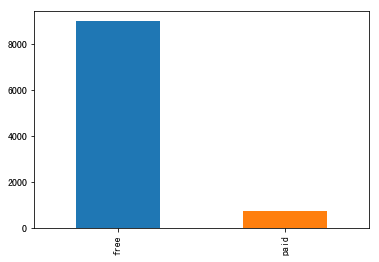

In [55]:
df_less_more['Type'].value_counts().plot(kind='bar');

#### 问题3：用户评分与下载量是否存在相关性，是否评分越高，下载量越大？

In [56]:
df_less_more.head()

,App,Category,Rating,Installs,Type
0,photo editor & candy camera & grid & scrapbook,art_and_design,4.1,10000,free
1,coloring book moana,art_and_design,3.9,500000,free
2,"u launcher lite – free live cool themes, hide ...",art_and_design,4.7,5000000,free
3,sketch - draw & paint,art_and_design,4.5,50000000,free
4,pixel draw - number art coloring book,art_and_design,4.3,100000,free


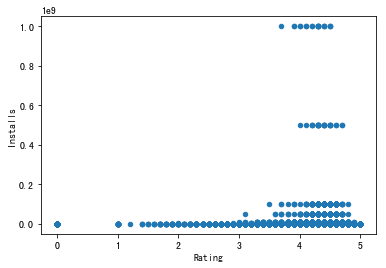

In [57]:
df_less_more.plot(x='Rating', y='Installs', kind='scatter');

作出评分与下载量的散点图，可以比较清晰的观察两者是否具有相关性。

## 得出结论

**问题1**：应用所属的各个分类中，下载量最高的应用各是什么？

**答案**：根据上一步中得到的表格，可以非常清晰的看到每个类别中下载量最高的应用是什么，以及对应的下载量如何。

**问题2**：免费应用个数与付费应用数量的占比如何？

**答案**：免费应用个数为8997，付费应用个数为757，所以免费应用占总应用的92.2%，付费应用占7.8%，更直观的表达见上一步的柱状图。

**问题3**：用户评分与下载量是否存在相关性，是否评分越高，下载量越大？

**答案**：根据上一步得到的散点图可以看出，评分和下载量之间有较强的相关性，尤其是评分位于3.5-5之间时，下载量明显更高。

## 反思

**问题**：在你的分析和总结过程中是否存在逻辑严谨。是否有改进的空间? 你可以从下面的一些角度进行思考：
1. 数据集是否完整，包含所有想要分析的数据？
2. 在对数据进行处理的时候，你的操作（例如删除/填充缺失值）是否可能影响结论？
3. 是否还有其他变量（本数据中没有）能够对你的分析有帮助？
4. 在得出结论时，你是否混淆了相关性和因果性？

**答案**：
1. 由于在数据处理时，还有部分冗余数据，虽然占比比较小，但对于问题2会有些许影响。
2. 散点图可以得出相关性，但无法得出因果关系，因果关系必须进行对照试验才能得到。